In [1]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import scipy.signal as conv
import scipy.ndimage.filters as filters
savefig = False #True to save the figures
#savefig = True
countourlabel=True
dpi = 50
figno = '2'
ylabel_fsize = 46
xlabel_fsize = 46
ytick_labelsize = 36
xtick_labelsize = 36
colorbar_fsize = 40
colorbar_labelsize = 27
contour_fsize = 15
pad_colorbar = 0.025
marker_size = 400
xlabel = '$\phi$ (rad)'
ylabel = '$\psi$ (rad)'
fontweight = 'normal'

vmax = 60

<ipython-input-2-f79f51a38e6a>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Xn,Yn,data1,vmin=0,vmax=vmax,cmap='jet')


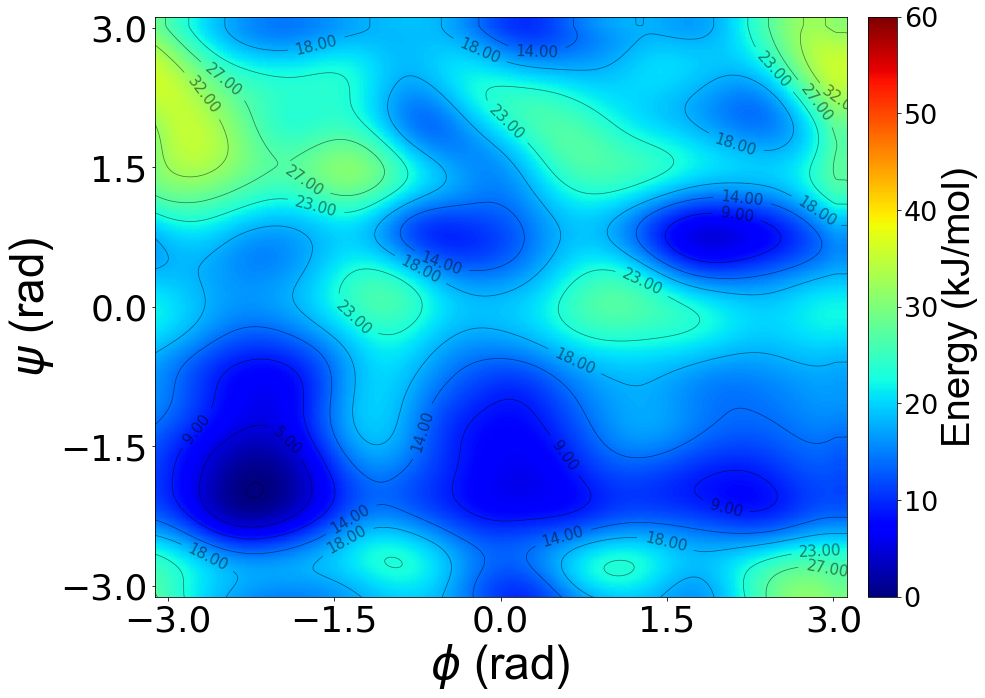

In [2]:
data = np.loadtxt('fes_10ns_remde_dftb.dat')
unique1, counts = np.unique(data[:,0],return_counts=True)
n1=len(unique1)
unique2, counts = np.unique(data[:,1],return_counts=True)
n2=len(unique2)
fes=np.reshape(data[:,2],(n1,n2))

X,Y = np.meshgrid(unique1,unique2)
Z=fes.reshape((len(unique1),len(unique1)))
c_black=np.linspace(0,90,11)
g_black=c_black+5

plt.figure(figsize=(14,9.8))
plt.gca()
plt.yticks([-3.0, -1.5, 0, 1.5, 3.0], size=ytick_labelsize)
plt.xticks([-3.0, -1.5, 0, 1.5, 3.0], size=xtick_labelsize)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.xlabel(xlabel, fontsize=xlabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.ylabel(ylabel, fontsize=ylabel_fsize, fontname = 'Arial', fontweight=fontweight)
f = interp2d(X, Y, Z, kind='cubic')
xnew = np.linspace(-np.pi, np.pi, 510)
ynew = np.linspace(-np.pi, np.pi, 510)
data1 = f(xnew,ynew)
Xn, Yn = np.meshgrid(xnew, ynew)
plt.axis([np.amin(X),np.amax(X),np.amin(Y),np.amax(Y)])
plt.pcolormesh(Xn,Yn,data1,vmin=0,vmax=vmax,cmap='jet')
#plt.colorbar(label='kJ/mol')
cbar2 = plt.colorbar(orientation="vertical", shrink=1, pad=0.025)
cbar2.ax.tick_params(labelsize=colorbar_labelsize)
cbar2.set_ticks(list(np.arange(0,vmax+10,10)))
cbar2.set_label('Energy (kJ/mol)', fontname = 'Arial', fontsize = colorbar_fsize, fontweight=fontweight)

filtermatrix = np.ones((25,25))/np.power(25,2)
Zconv = conv.convolve2d(data1.T,filtermatrix,boundary='wrap',mode='same')
Zconv = filters.gaussian_filter(data1,1.2,mode='wrap')
contoursd1 = plt.contour(xnew,ynew,Zconv,c_black,colors='k',alpha=0.5, linewidths=0.75, linestyles='solid', extend='neither')
contoursd2 = plt.contour(xnew,ynew,Zconv,g_black,colors='k',alpha=0.5, linewidths=0.75, linestyles='solid', extend='neither')
if countourlabel==True:
    plt.clabel(contoursd1, inline=True, fontsize=contour_fsize, fmt='%1.2f')
    plt.clabel(contoursd2, inline=True, fontsize=contour_fsize, colors='black', fmt='%1.2f') 
plt.ylim(-3.12, 3.12)
plt.xlim(-3.12, 3.12)
#plt.title('Remdesivir (DFTB)', fontsize=20)
plt.tight_layout()

In [4]:
fes, fes.shape

(array([[27.88958111, 25.81202162, 23.71948142, ..., 31.43147772,
         30.99469726, 29.71737487],
        [27.03784346, 25.28427715, 23.52157038, ..., 30.36454631,
         29.81991771, 28.62540991],
        [26.29088133, 24.87609257, 23.36799369, ..., 28.8281209 ,
         28.42404252, 27.51951407],
        ...,
        [33.13546711, 31.0490444 , 28.47654778, ..., 33.00108848,
         34.29964713, 34.32144785],
        [31.11414904, 28.81743184, 26.24182921, ..., 32.84451262,
         33.3941661 , 32.75495089],
        [29.24830002, 26.96471368, 24.56917818, ..., 32.25518149,
         32.19782878, 31.1070105 ]]),
 (51, 51))

# PES Remdesivir using DFTB

In [5]:
import pandas as pd
dfa = pd.read_fwf('COLVAR_5', colspecs='infer', header=None)

In [6]:
dfa

,0,1,2,3
0,0.00,2.088850,3.141135,0.0000
1,0.01,2.072875,3.115689,0.0000
2,0.02,2.049562,-3.098138,0.0000
3,0.03,2.011784,-3.127685,0.0000
4,0.04,2.015266,-3.100817,0.0000
...,...,...,...,...
999996,9999.96,2.641300,1.037940,68.4796
999997,9999.97,2.716800,1.153490,65.4173
999998,9999.98,2.632400,1.085530,67.5121
999999,9999.99,2.586400,1.076910,68.0066


In [7]:
pe = pd.read_fwf('MD_TE_remde_10ns.txt', colspecs='infer', header=None)

In [8]:
pe

,0
0,-2772.2900
1,-2772.2773
2,-2772.2530
3,-2772.2433
4,-2772.2548
...,...
9999996,-2770.4649
9999997,-2770.4621
9999998,-2770.4553
9999999,-2770.4569


In [9]:
def generate_interval(n, total_rows):
    index = []
    start = 0
    n_rows = int(total_rows/n)
    for i in range(n_rows+1):
        index.append(start)
        start +=  int(n)
    return index

In [10]:
a = generate_interval(10,10000000)
pe1 = pe.loc[a[0:-1]]
pe1.info

<bound method DataFrame.info of                  0
0       -2772.2900
10      -2772.2337
20      -2772.0497
30      -2771.8430
40      -2771.6869
...            ...
9999950 -2769.4262
9999960 -2769.6512
9999970 -2770.0325
9999980 -2770.3234
9999990 -2770.4528

[1000000 rows x 1 columns]>

In [11]:
dfa = dfa.drop(labels=1000000, axis=0)
dfa.info

<bound method DataFrame.info of               0         1         2        3
0          0.00  2.088850  3.141135   0.0000
1          0.01  2.072875  3.115689   0.0000
2          0.02  2.049562 -3.098138   0.0000
3          0.03  2.011784 -3.127685   0.0000
4          0.04  2.015266 -3.100817   0.0000
...         ...       ...       ...      ...
999995  9999.95  2.511300  1.009300  69.8811
999996  9999.96  2.641300  1.037940  68.4796
999997  9999.97  2.716800  1.153490  65.4173
999998  9999.98  2.632400  1.085530  67.5121
999999  9999.99  2.586400  1.076910  68.0066

[1000000 rows x 4 columns]>

In [12]:
dfa[4] = pe1[0].values
dfa

,0,1,2,3,4
0,0.00,2.088850,3.141135,0.0000,-2772.2900
1,0.01,2.072875,3.115689,0.0000,-2772.2337
2,0.02,2.049562,-3.098138,0.0000,-2772.0497
3,0.03,2.011784,-3.127685,0.0000,-2771.8430
4,0.04,2.015266,-3.100817,0.0000,-2771.6869
...,...,...,...,...,...
999995,9999.95,2.511300,1.009300,69.8811,-2769.4262
999996,9999.96,2.641300,1.037940,68.4796,-2769.6512
999997,9999.97,2.716800,1.153490,65.4173,-2770.0325
999998,9999.98,2.632400,1.085530,67.5121,-2770.3234


In [13]:
pe_range = -dfa[4].min()+dfa[4].max()
print ('PE range is %.2f eV'%pe_range)

PE range is 4.43 eV


<ipython-input-14-3e13adcf67bd>:8: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.tricontour(phi, psi, free, lw=4)


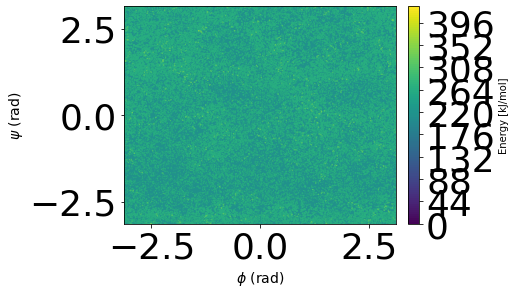

In [14]:
import matplotlib.pyplot as plt
phi, psi, free = dfa[1], dfa[2], dfa[4]
free = free*96.49
free = free - min(free)
plt.xlabel(r'$\phi$ (rad)', fontsize=14)
plt.ylabel(r'$\psi$ (rad)', fontsize=14)
#plt.scatter(phi, psi, marker='x', s=0.2, c=free )
plt.tricontour(phi, psi, free, lw=4)
plt.tricontourf(phi, psi, free, 120)
#plt.contourf(X, Y, Z, 20, cmap='RdGy')
#plt.legend(loc=0)
cbar = plt.colorbar(pad=0.035)
cbar.set_label('Energy [kJ/mol]')
plt.show()

In [15]:
import numpy as np
phi_new = np.linspace(-np.pi, np.pi, 51)
phi_new.round(2)

array([-3.14, -3.02, -2.89, -2.76, -2.64, -2.51, -2.39, -2.26, -2.14,
       -2.01, -1.88, -1.76, -1.63, -1.51, -1.38, -1.26, -1.13, -1.01,
       -0.88, -0.75, -0.63, -0.5 , -0.38, -0.25, -0.13,  0.  ,  0.13,
        0.25,  0.38,  0.5 ,  0.63,  0.75,  0.88,  1.01,  1.13,  1.26,
        1.38,  1.51,  1.63,  1.76,  1.88,  2.01,  2.14,  2.26,  2.39,
        2.51,  2.64,  2.76,  2.89,  3.02,  3.14])

In [16]:
rslt_df = dfa.sort_values(by = [1])
r314 = rslt_df[rslt_df[1].round(2)==phi_new[0].round(2)]
r314

,0,1,2,3,4
52739,527.39,-3.1414,0.81408,11.47590,-2769.9716
48653,486.53,-3.1414,3.00734,8.93936,-2769.3433
72525,725.25,-3.1413,-2.25270,16.69600,-2770.3573
75953,759.53,-3.1413,-1.64800,16.46800,-2770.5284
52699,526.99,-3.1412,0.34916,13.31860,-2770.0470
...,...,...,...,...,...
505041,5050.41,-3.1350,0.69230,54.56800,-2769.7315
675032,6750.32,-3.1350,-1.33900,64.63000,-2769.7813
699800,6998.00,-3.1350,-1.66700,68.04000,-2770.0975
937010,9370.10,-3.1350,-0.08800,61.99000,-2769.9664


In [17]:
r302 = rslt_df[rslt_df[1].round(2)==phi_new[1].round(2)]
r302

,0,1,2,3,4
690974,6909.74,-3.025,-0.8930,63.2200,-2770.0662
441094,4410.94,-3.025,1.0597,43.8410,-2769.9720
833239,8332.39,-3.025,-1.9480,71.0600,-2770.7085
12787,127.87,-3.025,-1.0913,9.1897,-2770.2567
573948,5739.48,-3.025,1.7629,43.1600,-2769.8303
...,...,...,...,...,...
112430,1124.30,-3.015,-0.7890,28.0700,-2770.0135
514355,5143.55,-3.015,0.4793,54.9940,-2769.7011
767124,7671.24,-3.015,2.6967,55.0460,-2769.8224
391597,3915.97,-3.015,0.1844,47.4310,-2769.7412


In [53]:
for i in range(51):
        r = rslt_df[rslt_df[1].round(2)==phi_new[i].round(2)]
        r.to_csv(r"te_{}.csv".format(i), header=False)

In [18]:
tes01 = pd.read_csv("te_0.csv", header = None)

In [19]:
tes01

,0,1,2,3,4,5
0,52739,527.39,-3.1414,0.81408,11.47590,-2769.9716
1,48653,486.53,-3.1414,3.00734,8.93936,-2769.3433
2,72525,725.25,-3.1413,-2.25270,16.69600,-2770.3573
3,75953,759.53,-3.1413,-1.64800,16.46800,-2770.5284
4,52699,526.99,-3.1412,0.34916,13.31860,-2770.0470
...,...,...,...,...,...,...
818,505041,5050.41,-3.1350,0.69230,54.56800,-2769.7315
819,675032,6750.32,-3.1350,-1.33900,64.63000,-2769.7813
820,699800,6998.00,-3.1350,-1.66700,68.04000,-2770.0975
821,937010,9370.10,-3.1350,-0.08800,61.99000,-2769.9664


In [20]:
angles = np.linspace(-np.pi, np.pi, 51)
angles = np.round(angles,2)
anglesc1= angles[0:26] + 0.02 
anglesc2 = angles[26:] - 0.02
anglesc = list(anglesc1) + list(anglesc2)
anglesc = np.array(anglesc)
anglesc = np.round(anglesc,1)

In [21]:
anglesc, anglesc[0]

(array([-3.1, -3. , -2.9, -2.7, -2.6, -2.5, -2.4, -2.2, -2.1, -2. , -1.9,
        -1.7, -1.6, -1.5, -1.4, -1.2, -1.1, -1. , -0.9, -0.7, -0.6, -0.5,
        -0.4, -0.2, -0.1,  0. ,  0.1,  0.2,  0.4,  0.5,  0.6,  0.7,  0.9,
         1. ,  1.1,  1.2,  1.4,  1.5,  1.6,  1.7,  1.9,  2. ,  2.1,  2.2,
         2.4,  2.5,  2.6,  2.7,  2.9,  3. ,  3.1]),
 -3.1)

In [22]:
dic2 = {}
dic3 = {}
for z in range(51):
    tes01 = pd.read_csv("te_"+str(z)+".csv", header = None)
    level = 'level%d' %z
    dic1 = []
    dic2[level] = {}
    dic3[level] = {}
    for j in range(len(anglesc)):
        for i in range(len(tes01[0])):
            if (tes01[3].round(1)[i]==anglesc[j]):
                dic1.append(tes01[5][i])
        dic2[level][angles[z],angles[j]]=np.mean(dic1)
        dic3[level][angles[z],angles[j]]=np.min(dic1)
        dic1 = []

In [32]:
ndca = pd.DataFrame()
ndcm = pd.DataFrame()
for i in range(51):
    ndca[i] = (dic2['level%d'%i].values())
    ndcm[i] = (dic3['level%d'%i].values())
ndca

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-2769.682975,-2769.870981,-2769.791332,-2769.840261,-2769.803687,-2769.885179,-2769.874363,-2769.963709,-2769.927937,-2769.915850,...,-2769.889826,-2769.880467,-2769.928552,-2769.699753,-2769.785380,-2769.766271,-2769.806727,-2769.672840,-2769.844368,-2769.797048
1,-2769.697231,-2769.857677,-2769.978786,-2769.764917,-2769.827824,-2769.837094,-2769.905422,-2769.928990,-2769.934008,-2769.890291,...,-2769.764559,-2769.897028,-2769.668652,-2769.738672,-2769.779750,-2769.674257,-2769.849283,-2769.845326,-2769.688630,-2769.735892
2,-2769.940540,-2769.924662,-2769.756831,-2769.730605,-2769.845803,-2769.772881,-2769.829647,-2769.758506,-2769.933674,-2769.777932,...,-2769.932432,-2769.784300,-2769.847270,-2769.703788,-2769.741348,-2769.628687,-2769.639406,-2769.767871,-2769.723987,-2769.875057
3,-2769.764400,-2769.696300,-2769.633536,-2769.766533,-2769.728950,-2770.080147,-2769.733169,-2769.951736,-2769.739260,-2769.916700,...,-2769.773686,-2769.779517,-2769.565408,-2769.897444,-2769.745940,-2769.742436,-2770.123600,-2769.868273,-2769.274114,-2769.550340
4,-2769.635233,-2769.952100,-2769.855736,-2769.884676,-2769.951784,-2769.957886,-2769.875087,-2770.064564,-2770.002864,-2770.200450,...,-2769.863353,-2769.747280,-2769.753480,-2769.926855,-2769.909747,-2769.894608,-2769.877279,-2769.652722,-2769.966357,-2769.826233
5,-2769.816073,-2769.965419,-2769.961592,-2770.038725,-2770.007175,-2770.079631,-2770.000707,-2770.017838,-2770.073821,-2770.202255,...,-2769.967096,-2769.954825,-2769.967527,-2770.111296,-2769.750191,-2769.902619,-2769.856109,-2769.910667,-2769.975650,-2769.917784
6,-2769.774483,-2769.929345,-2769.908713,-2770.036945,-2769.987792,-2770.083239,-2770.023194,-2770.116158,-2770.070857,-2770.070588,...,-2769.966945,-2770.047502,-2770.022824,-2769.871385,-2769.947556,-2770.047032,-2769.942706,-2769.865056,-2769.939127,-2769.982764
7,-2769.911004,-2769.977738,-2769.904152,-2770.002424,-2769.931236,-2770.069876,-2770.083509,-2770.172164,-2770.046189,-2770.145338,...,-2769.970128,-2770.058308,-2770.114890,-2769.981486,-2769.963947,-2770.004097,-2769.767907,-2769.911895,-2770.008634,-2769.917375
8,-2769.977443,-2769.803395,-2770.091552,-2770.061921,-2770.160519,-2770.114166,-2770.041595,-2769.962179,-2770.125555,-2770.031237,...,-2769.970717,-2770.036302,-2770.036640,-2770.009115,-2770.025655,-2769.971202,-2769.962920,-2770.148750,-2769.857049,-2770.017767
9,-2769.985727,-2769.985587,-2770.060044,-2770.098926,-2770.071039,-2770.191174,-2770.096590,-2770.063526,-2770.114718,-2770.062628,...,-2770.086126,-2770.038792,-2770.112033,-2770.069808,-2769.913246,-2770.103808,-2770.057468,-2770.049821,-2770.017982,-2770.117007


In [ ]:
plt.contourf(ndca,20,cmap='jet')
ax=plt.gca()
ax.set_aspect('equal')
plt.title('DFTB PES')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.colorbar()
plt.show()

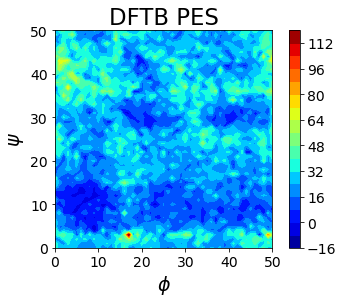

In [53]:
ndcaa = ndca*96.49 + 267289
plt.contourf(ndcaa, 20, cmap='jet')
ax=plt.gca()
ax.set_aspect('equal')
plt.title('DFTB PES')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.colorbar()
plt.show()

In [63]:
x = np.linspace(-np.pi, np.pi, 51)
y= x.T

<ipython-input-79-459a79fae026>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(newx,newy,pes,vmin=0,vmax=120,cmap='jet')
<ipython-input-79-459a79fae026>:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Xplot,Yplot,(np.fliplr(Zinterp(Xplot,Yplot))),vmin=0,vmax=120,cmap='jet')
<ipython-input-79-459a79fae026>:102: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  E

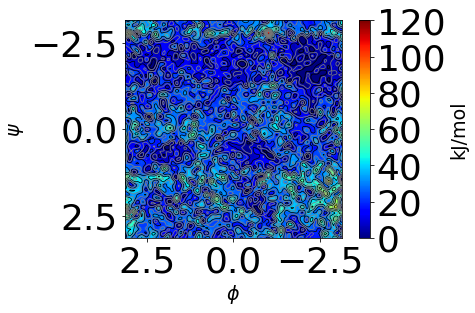

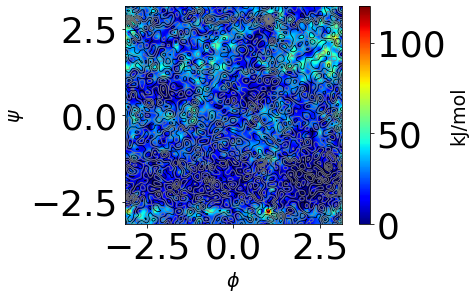

<Figure size 432x288 with 0 Axes>

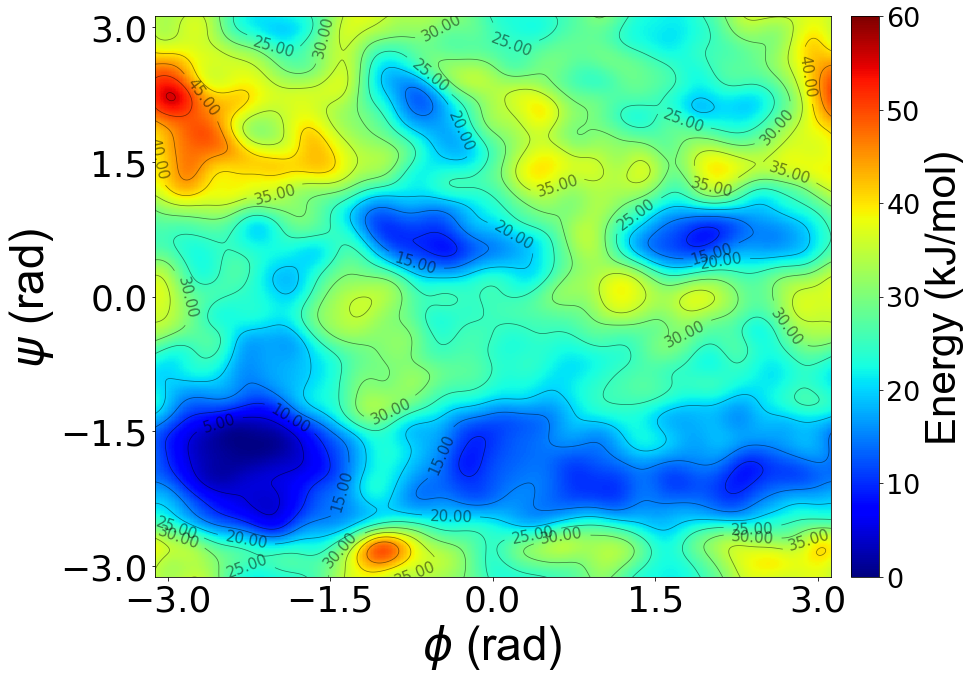

In [79]:
unique1, counts = np.unique(x,return_counts=True)
n1=len(unique1)
unique2, counts = np.unique(y.T,return_counts=True)
n2=len(unique2)
fes=ndcaa

##mn=np.amin(fes)
#fes=(fes-mn)*96.49
fes1 = fes.copy()
import scipy.ndimage
import matplotlib
import scipy.ndimage.filters as filters
xlabel = '$\phi$ (rad)'
ylabel = '$\psi$ (rad)'
ylabel_fsize = 46
xlabel_fsize = 46
ytick_labelsize = 36
xtick_labelsize = 36
colorbar_fsize = 42
colorbar_labelsize = 27
pad_colorbar = 0.025
vmax = 60
fontweight = 'normal'
pes = fes
pes = scipy.ndimage.zoom(pes, 3)
newx=np.linspace(-np.pi,np.pi,pes.shape[0])
newy=np.linspace(-np.pi,np.pi,pes.shape[1])
plt.figure(2)

ax=plt.gca()
ax.set_aspect('equal')

plt.axis([np.amin(newx),np.amax(newx),np.amin(newy),np.amax(newy)])
plt.pcolormesh(newx,newy,pes,vmin=0,vmax=120,cmap='jet')
plt.colorbar(label='kJ/mol',ticks=[0,20,40,60,80,100,120])

c_black=np.linspace(0,100,11)
g_black=c_black+5

plt.contour(newx,newy,pes,c_black,colors='black',linewidths=0.75)
plt.contour(newx,newy,pes,g_black,colors='grey',linewidths=0.75)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
#plt.show()
#plt.savefig('pbe_pes.png',dpi=300,bbox_inches='tight')

import scipy.interpolate as interp
X,Y = np.meshgrid(np.linspace(np.min(newx),np.max(newx),pes.shape[0]),np.linspace(np.min(newy),np.max(newy),pes.shape[0]))
Xplot,Yplot = np.meshgrid(np.linspace(np.min(newx),np.max(newx),500),np.linspace(np.min(newy),np.max(newy),500))
XY = np.vstack((np.ravel(X),np.ravel(Y)))
Zinterp = interp.LinearNDInterpolator(XY.T,np.ravel(pes))

plt.figure(3)
ax=plt.gca()
ax.set_aspect('equal')
plt.axis([np.amin(Xplot),np.amax(Xplot),np.amin(Yplot),np.amax(Yplot)])
plt.pcolormesh(Xplot,Yplot,(np.fliplr(Zinterp(Xplot,Yplot))),vmin=0,vmax=120,cmap='jet')
plt.colorbar(label='kJ/mol')
c_black=np.linspace(0,100,11)
g_black=c_black+5

plt.contour(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),c_black,colors='black',linewidths=0.75)
plt.contour(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),g_black,colors='grey',linewidths=0.75)

plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.figure(4)

font = {'family' : 'normal',
        'size'   : 19}

matplotlib.rc('font', **font)

plt.figure(figsize=(14,9.8))
plt.gca()
plt.yticks([-3.0, -1.5, 0, 1.5, 3.0], size=ytick_labelsize)
plt.xticks([-3.0, -1.5, 0, 1.5, 3.0], size=xtick_labelsize)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.xlabel(xlabel, fontsize=xlabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.ylabel(ylabel, fontsize=ylabel_fsize, fontname = 'Arial', fontweight=fontweight)

ylabel_fsize = 46
xlabel_fsize = 46
ytick_labelsize = 36
xtick_labelsize = 36
# plt.xlabel('$\phi$')
# plt.ylabel('$\psi$')
# ax=plt.gca()
# ax.set_aspect('equal')

#filtermatrix = np.ones((25,25))/np.power(25,2)
#Zconv=conv.convolve2d(Z.T,filtermatrix,boundary='wrap',mode='same')
#Zconv = filters.gaussian_filter(np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),12,mode='wrap')/92*102
Zconv = filters.gaussian_filter(((Zinterp(Xplot,Yplot))),12,mode='wrap')/92*102
plt.axis([np.amin(Xplot),np.amax(Xplot),np.amin(Yplot),np.amax(Yplot)])
plt.pcolormesh(Xplot,Yplot,Zconv,vmin=0,vmax=vmax,cmap='jet')
cbar2 = plt.colorbar(orientation="vertical", shrink=1, pad=0.025)
cbar2.ax.tick_params(labelsize=colorbar_labelsize)
cbar2.set_ticks(list(np.arange(0,vmax+10,10)))
cbar2.set_label('Energy (kJ/mol)', fontname = 'Arial', fontsize = colorbar_fsize, fontweight=fontweight)
#plt.colorbar(label='kJ/mol')
contoursd1 = plt.contour(Xplot,Yplot,Zconv,c_black,colors='k',alpha=0.5, linewidths=0.75, linestyles='solid', extend='neither')
contoursd2 = plt.contour(Xplot,Yplot,Zconv,g_black,colors='k',alpha=0.5, linewidths=0.75, linestyles='solid', extend='neither')
if True==True:
    plt.clabel(contoursd1, inline=True, fontsize=contour_fsize, fmt='%1.2f')
    plt.clabel(contoursd2, inline=True, fontsize=contour_fsize, colors='black', fmt='%1.2f') 
plt.yticks([-3.0, -1.5, 0, 1.5, 3.0], size=ytick_labelsize)
plt.xticks([-3.0, -1.5, 0, 1.5, 3.0], size=xtick_labelsize)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.xlabel(xlabel, fontsize=xlabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.ylabel(ylabel, fontsize=ylabel_fsize, fontname = 'Arial', fontweight=fontweight)
# plt.scatter(-2.8,2.9,c='r',marker='o',s=150)
# plt.scatter(-1.5,1.5,c='r',marker='s',s=150)
# plt.scatter(1.25,-0.95,c='r',marker='v',s=150)
plt.ylim(-3.12, 3.12)
plt.xlim(-3.12, 3.12)
plt.tight_layout()
#plt.title('DFTB PES AVERAGE')
plt.savefig('DFTB_PES_remde.png', dpi=50, bbox_inches='tight')

In [80]:
155.63-24


131.63

In [24]:
x = np.linspace(np.pi, -np.pi, 51)
y= x

In [25]:
unique1, counts = np.unique(x,return_counts=True)
n1=len(unique1)
unique2, counts = np.unique(y.T,return_counts=True)
n2=len(unique2)
pes=ndca

mn=np.amin(pes)
pes=(pes-mn)*96.49
pes1 = pes.copy()

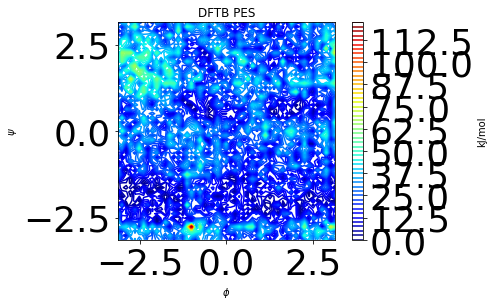

In [26]:
fig=plt.figure()
col=plt.contour(unique1,unique2,pes,50,cmap='jet')
plt.colorbar(col,label='kJ/mol')
ax=plt.gca()
ax.set_aspect('equal')
plt.title('DFTB PES')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.show()

In [108]:
pes=ndcm
mn=np.amin(pes)
pes=(pes-mn)*96.49

# Entropy of Remdesivir using DFTB

In [81]:
ndca.shape

(51, 51)

In [82]:
fes.shape

(51, 51)

In [83]:
fes

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,42.289742,24.149048,31.834416,27.113262,30.642286,22.779083,23.822682,15.201736,18.653363,19.819634,...,22.330696,23.233771,18.593981,40.670801,32.408684,34.252527,30.348944,43.267668,26.716932,31.282838
1,40.914203,25.432732,13.746966,34.383135,28.313231,27.418844,20.825783,18.551709,18.067568,22.285799,...,34.417693,21.635768,43.671732,36.915517,32.951923,43.130928,26.242651,26.624501,41.744127,37.183813
2,17.437295,18.969408,35.163353,37.693967,26.578474,33.614704,28.137355,35.001732,18.099789,33.127300,...,18.219636,32.512893,26.436960,40.281451,36.657368,47.527943,46.493691,34.098086,38.332527,23.755736
3,34.433044,41.004013,47.060076,34.227199,37.853615,3.966610,37.446501,16.356958,36.858803,19.737617,...,33.537065,32.974437,53.633750,21.595586,36.214249,36.552315,-0.226164,24.410365,81.740713,55.087693
4,46.896336,16.321871,25.620061,22.827626,16.352342,15.763607,23.752860,5.470220,11.423625,-7.641420,...,24.885037,36.084953,35.486715,18.757761,20.408476,21.869304,23.541354,45.208833,14.946199,28.466746
5,29.447084,15.036686,15.405958,7.963425,11.007684,4.016381,11.631768,9.978818,4.576970,-7.815562,...,14.874892,16.058936,14.833293,0.961020,35.804079,21.096270,25.584034,20.319773,14.049532,19.633002
6,33.460103,18.517501,20.508292,8.135150,12.877956,3.668280,9.461983,0.491894,4.863021,4.888964,...,14.889502,7.116536,9.497721,24.110076,16.760297,7.161923,17.228274,24.720765,17.573668,13.363102
7,20.287190,13.848076,20.948374,11.466085,18.335022,4.957646,3.642246,-4.912088,7.243205,-2.323657,...,14.582358,6.073891,0.614233,13.486369,15.178766,11.304693,34.094640,20.201277,10.866859,19.672486
8,13.876539,30.670442,2.866162,5.725238,-3.788521,0.684169,7.686511,15.349390,-0.414758,8.685967,...,14.525503,8.197178,8.164606,10.820457,9.224565,14.478677,15.277849,-2.652888,25.493376,9.985694
9,13.077175,13.090701,5.906354,2.154649,4.845475,-6.746398,2.379985,5.570411,0.630820,5.657073,...,3.389657,7.956930,0.889904,4.964256,20.070921,1.683534,6.154938,6.892767,9.964934,0.410027


In [84]:
ndca

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-2769.682975,-2769.870981,-2769.791332,-2769.840261,-2769.803687,-2769.885179,-2769.874363,-2769.963709,-2769.927937,-2769.915850,...,-2769.889826,-2769.880467,-2769.928552,-2769.699753,-2769.785380,-2769.766271,-2769.806727,-2769.672840,-2769.844368,-2769.797048
1,-2769.697231,-2769.857677,-2769.978786,-2769.764917,-2769.827824,-2769.837094,-2769.905422,-2769.928990,-2769.934008,-2769.890291,...,-2769.764559,-2769.897028,-2769.668652,-2769.738672,-2769.779750,-2769.674257,-2769.849283,-2769.845326,-2769.688630,-2769.735892
2,-2769.940540,-2769.924662,-2769.756831,-2769.730605,-2769.845803,-2769.772881,-2769.829647,-2769.758506,-2769.933674,-2769.777932,...,-2769.932432,-2769.784300,-2769.847270,-2769.703788,-2769.741348,-2769.628687,-2769.639406,-2769.767871,-2769.723987,-2769.875057
3,-2769.764400,-2769.696300,-2769.633536,-2769.766533,-2769.728950,-2770.080147,-2769.733169,-2769.951736,-2769.739260,-2769.916700,...,-2769.773686,-2769.779517,-2769.565408,-2769.897444,-2769.745940,-2769.742436,-2770.123600,-2769.868273,-2769.274114,-2769.550340
4,-2769.635233,-2769.952100,-2769.855736,-2769.884676,-2769.951784,-2769.957886,-2769.875087,-2770.064564,-2770.002864,-2770.200450,...,-2769.863353,-2769.747280,-2769.753480,-2769.926855,-2769.909747,-2769.894608,-2769.877279,-2769.652722,-2769.966357,-2769.826233
5,-2769.816073,-2769.965419,-2769.961592,-2770.038725,-2770.007175,-2770.079631,-2770.000707,-2770.017838,-2770.073821,-2770.202255,...,-2769.967096,-2769.954825,-2769.967527,-2770.111296,-2769.750191,-2769.902619,-2769.856109,-2769.910667,-2769.975650,-2769.917784
6,-2769.774483,-2769.929345,-2769.908713,-2770.036945,-2769.987792,-2770.083239,-2770.023194,-2770.116158,-2770.070857,-2770.070588,...,-2769.966945,-2770.047502,-2770.022824,-2769.871385,-2769.947556,-2770.047032,-2769.942706,-2769.865056,-2769.939127,-2769.982764
7,-2769.911004,-2769.977738,-2769.904152,-2770.002424,-2769.931236,-2770.069876,-2770.083509,-2770.172164,-2770.046189,-2770.145338,...,-2769.970128,-2770.058308,-2770.114890,-2769.981486,-2769.963947,-2770.004097,-2769.767907,-2769.911895,-2770.008634,-2769.917375
8,-2769.977443,-2769.803395,-2770.091552,-2770.061921,-2770.160519,-2770.114166,-2770.041595,-2769.962179,-2770.125555,-2770.031237,...,-2769.970717,-2770.036302,-2770.036640,-2770.009115,-2770.025655,-2769.971202,-2769.962920,-2770.148750,-2769.857049,-2770.017767
9,-2769.985727,-2769.985587,-2770.060044,-2770.098926,-2770.071039,-2770.191174,-2770.096590,-2770.063526,-2770.114718,-2770.062628,...,-2770.086126,-2770.038792,-2770.112033,-2770.069808,-2769.913246,-2770.103808,-2770.057468,-2770.049821,-2770.017982,-2770.117007


In [120]:
pes=ndca
mn=np.amin(pes)
pes=(pes-mn)*96.49

In [86]:
pes.shape

(153, 153)

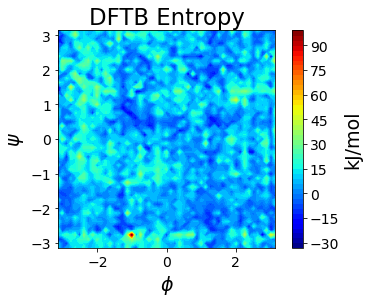

In [124]:
fig=plt.figure(0)
col=plt.contourf(unique1,unique2,entropy,50,cmap='jet')
plt.colorbar(col,label='kJ/mol')
ax=plt.gca()
ax.set_aspect('equal')
plt.title('DFTB Entropy')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.show()

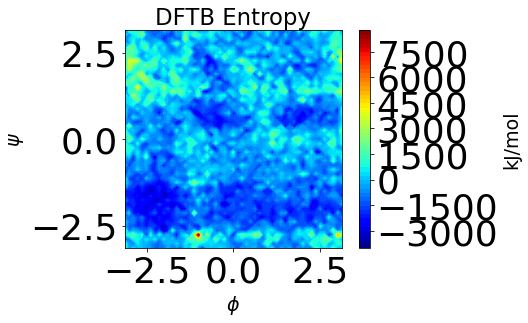

In [92]:
fig=plt.figure(0)
col=plt.contourf(unique1,unique2,entropy,50,cmap='jet')
plt.colorbar(col,label='kJ/mol')
ax=plt.gca()
ax.set_aspect('equal')
plt.title('DFTB Entropy')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.show()

<ipython-input-126-da9d1315acd4>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(newx,newy,pes,vmin=0,vmax=vmax,cmap='jet')
<ipython-input-126-da9d1315acd4>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),vmin=0,vmax=vmax,cmap='jet')
<ipython-input-126-da9d1315acd4>:90: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated 

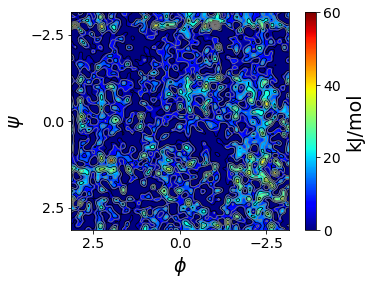

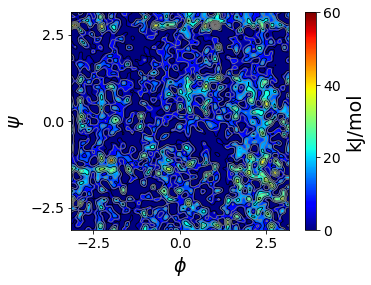

<Figure size 432x288 with 0 Axes>

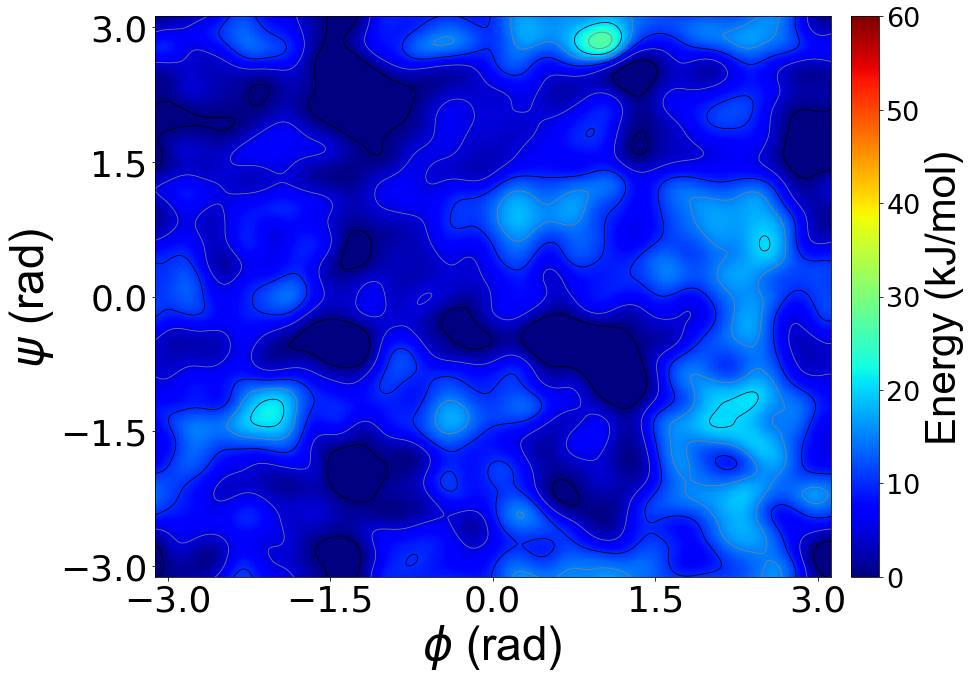

In [126]:
import scipy.ndimage
import matplotlib
import scipy.ndimage.filters as filters
vmax = 60
fontweight = 'normal'
pes = entropy
pes = scipy.ndimage.zoom(pes, 3)
newx=np.linspace(-np.pi,np.pi,pes.shape[0])
newy=np.linspace(-np.pi,np.pi,pes.shape[1])
plt.figure(2)

ax=plt.gca()
ax.set_aspect('equal')

plt.axis([np.amin(newx),np.amax(newx),np.amin(newy),np.amax(newy)])
plt.pcolormesh(newx,newy,pes,vmin=0,vmax=vmax,cmap='jet')
plt.colorbar(label='kJ/mol',ticks=[0,20,40,60,80,100,120])

c_black=np.linspace(0,100,11)
g_black=c_black+5

plt.contour(newx,newy,pes,c_black,colors='black',linewidths=0.75)
plt.contour(newx,newy,pes,g_black,colors='grey',linewidths=0.75)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
#plt.show()
#plt.savefig('pbe_pes.png',dpi=300,bbox_inches='tight')

import scipy.interpolate as interp
X,Y = np.meshgrid(np.linspace(np.min(newx),np.max(newx),pes.shape[0]),np.linspace(np.min(newy),np.max(newy),pes.shape[0]))
Xplot,Yplot = np.meshgrid(np.linspace(np.min(newx),np.max(newx),500),np.linspace(np.min(newy),np.max(newy),500))
XY = np.vstack((np.ravel(X),np.ravel(Y)))
Zinterp = interp.LinearNDInterpolator(XY.T,np.ravel(pes))

plt.figure(3)
ax=plt.gca()
ax.set_aspect('equal')
plt.axis([np.amin(Xplot),np.amax(Xplot),np.amin(Yplot),np.amax(Yplot)])
plt.pcolormesh(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),vmin=0,vmax=vmax,cmap='jet')
plt.colorbar(label='kJ/mol')
c_black=np.linspace(0,100,11)
g_black=c_black+5

plt.contour(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),c_black,colors='black',linewidths=0.75)
plt.contour(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),g_black,colors='grey',linewidths=0.75)

plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.figure(4)

# font = {'family' : 'normal',
#         'size'   : 19}

# matplotlib.rc('font', **font)

plt.figure(figsize=(14,9.8))
plt.gca()
plt.yticks([-3.0, -1.5, 0, 1.5, 3.0], size=ytick_labelsize)
plt.xticks([-3.0, -1.5, 0, 1.5, 3.0], size=xtick_labelsize)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.xlabel(xlabel, fontsize=xlabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.ylabel(ylabel, fontsize=ylabel_fsize, fontname = 'Arial', fontweight=fontweight)


# plt.xlabel('$\phi$')
# plt.ylabel('$\psi$')
# ax=plt.gca()
# ax.set_aspect('equal')

#filtermatrix = np.ones((25,25))/np.power(25,2)
#Zconv=conv.convolve2d(Z.T,filtermatrix,boundary='wrap',mode='same')
dpi = 50
figno = '5'
ylabel_fsize = 46
xlabel_fsize = 46
ytick_labelsize = 36
xtick_labelsize = 36
colorbar_fsize = 42
colorbar_labelsize = 27
pad_colorbar = 0.025
marker_size = 400
xlabel='$\phi$ (rad)'
ylabel='$\psi$ (rad)'
Zconv = filters.gaussian_filter(np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),12,mode='wrap')/92*102
plt.axis([np.amin(Xplot),np.amax(Xplot),np.amin(Yplot),np.amax(Yplot)])
plt.pcolormesh(Xplot,Yplot,Zconv,vmin=0,vmax=vmax,cmap='jet')
cbar2 = plt.colorbar(orientation="vertical", shrink=1, pad=0.025)
cbar2.ax.tick_params(labelsize=colorbar_labelsize)
cbar2.set_ticks(list(np.arange(0,vmax+10,10)))
cbar2.set_label('Energy (kJ/mol)', fontname = 'Arial', fontsize = colorbar_fsize, fontweight=fontweight)
#plt.colorbar(label='kJ/mol')
plt.contour(Xplot,Yplot,Zconv,c_black,colors='black',linewidths=0.75)
plt.contour(Xplot,Yplot,Zconv,g_black,colors='grey',linewidths=0.75)

plt.xticks([-3,-1.5,0,1.5,3])
plt.yticks([-3,-1.5,0,1.5,3])

# plt.scatter(-2.8,2.9,c='r',marker='o',s=150)
# plt.scatter(-1.5,1.5,c='r',marker='s',s=150)
# plt.scatter(1.25,-0.95,c='r',marker='v',s=150)
plt.ylim(-3.12, 3.12)
plt.xlim(-3.12, 3.12)
plt.tight_layout()
#font = {'family' : 'normal',
#        'size'   : 19}

#matplotlib.rc('font', **font)
plt.savefig('DFTB_entropy_remde.png', dpi=50, bbox_inches='tight')
#plt.title('DFTB PES MIN')